In [3]:
import numpy as np 
import pandas as pd

In [2]:
events = pd.read_csv('/input/sports-stats-data/athlete_events.csv')
regions = pd.read_csv('/input/sports-stats-data/noc_regions.csv')

df1 = events.merge(regions[['NOC','region']], left_on = 'NOC', right_on = 'NOC', how = 'left')

In [4]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [5]:
h = df1.copy()
print(h.shape)
print(h.info())

(271116, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB
None


In [6]:
h.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64

In [7]:
h.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


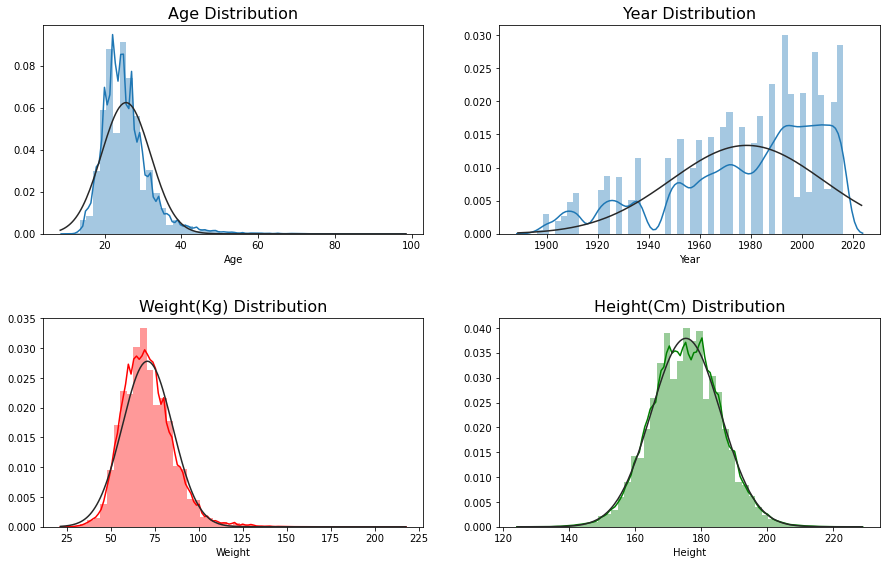

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (15,9))

plt.subplot(221)
g1 = sns.distplot(h['Age'],fit =norm)
g1.set_title("Age Distribution", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(h['Height'],color='green',fit =norm)
g2.set_title('Height(Cm) Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(h['Weight'], color='r',fit =norm)
g3.set_title("Weight(Kg) Distribution", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(h['Year'],fit =norm)
g4.set_title("Year Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [9]:
#According To Google Oldest Person Particiaped in Olympic is 72 Years Old
h = h[~(h.Age>=73)]
h.Age.sort_values(ascending = True).unique()

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., nan])

In [12]:
from pandasql import sqldf
pysqldf = lambda q: (sqldf(q,globals()))

In [64]:
pysqldf(" SELECT count(*) as 'Under 18 Athletes' FROM h WHERE AGE<18 ")

,Under 18 Athletes
0,12508


In [65]:
pysqldf(" SELECT count(*) as 'Above 50 Athletes' FROM h WHERE AGE>50 ")

,Above 50 Athletes
0,1894


* Youngest Olympic Athlete was 10 Year Old.
* Oldest Olympic Athlete was 72 Year Old.

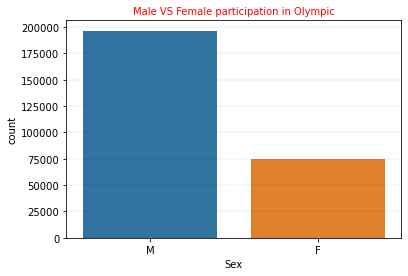

In [116]:
sns.countplot(x='Sex',data=h)
plt.title('Male VS Female participation in Olympic',size=10,color='red')
plt.grid(True,color='b', ls = '--', lw = 0.1,axis ='y')

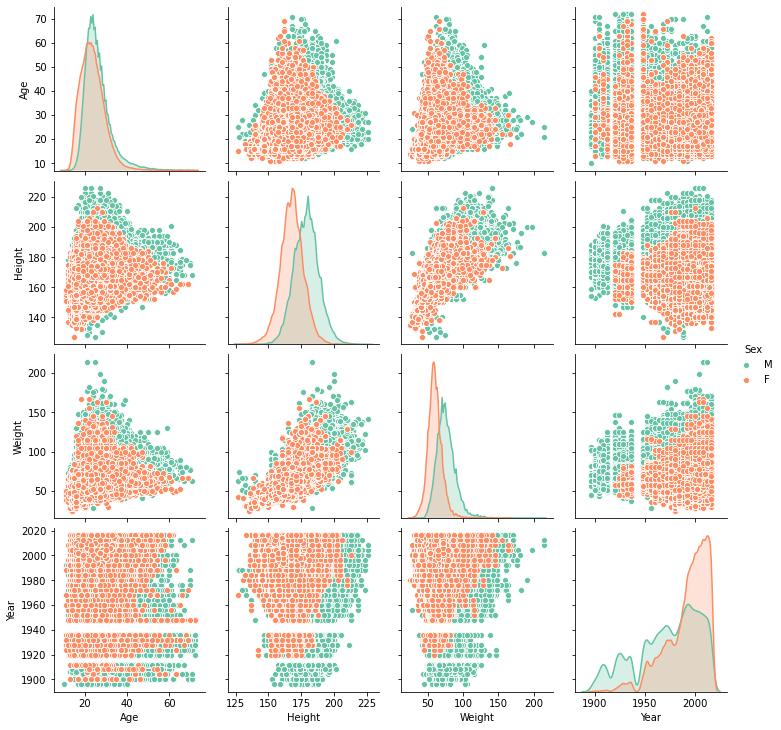

In [10]:
# Comparisen between Male & Fmale Athletes

g = sns.pairplot(h.drop('ID',axis=1), hue="Sex", palette="Set2", diag_kind="kde", height=2.5)

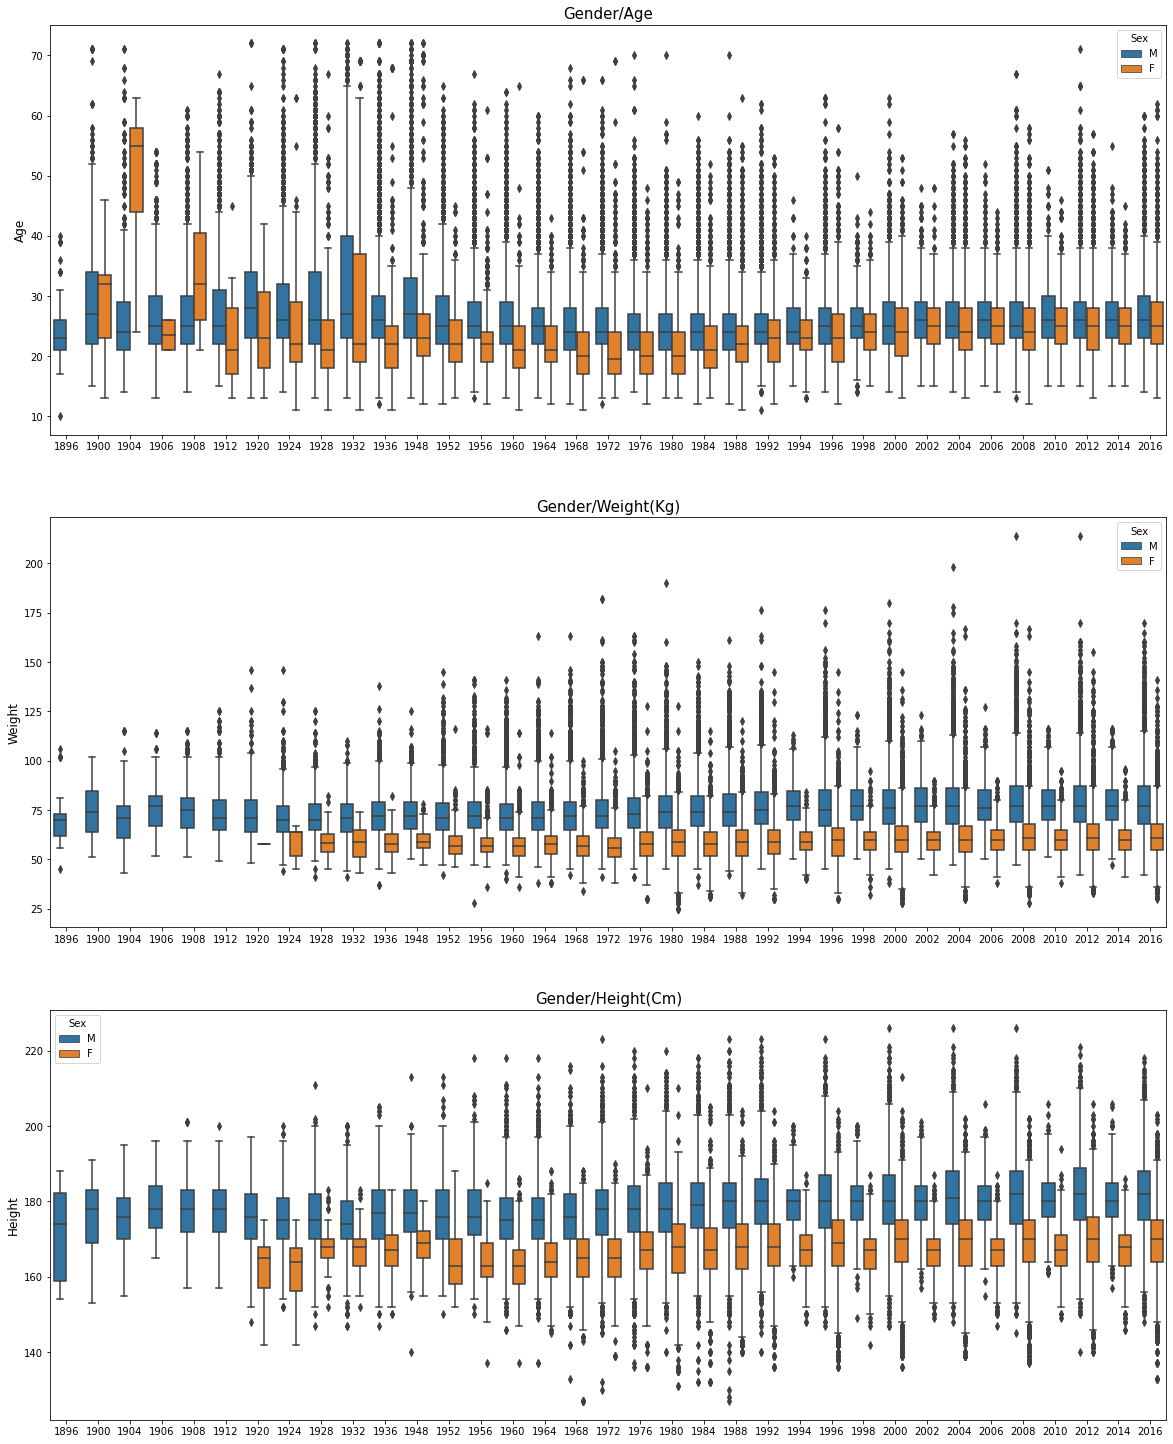

In [118]:
plt.figure(figsize = (20,25))

plt.subplot(311)
g = sns.boxplot(x = 'Year', y = 'Age', hue='Sex', data = h)
g.set_title("Gender/Age" , fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel('Age', fontsize = 12)

plt.subplot(312)
g = sns.boxplot(x = 'Year', y = 'Weight', hue='Sex', data = h)
g.set_title("Gender/Weight(Kg)" , fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel('Weight', fontsize = 12)

plt.subplot(313)
g = sns.boxplot(x = 'Year', y = 'Height', hue='Sex', data = h)
g.set_title("Gender/Height(Cm)" , fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel('Height', fontsize = 12)

plt.subplots_adjust(hspace  = 0.2, top = 0.9)

plt.show()

In [19]:
#splitting summer and winter olympics
summer = h[h['Season'] == "Summer"]
winter = h[h['Season'] == "Winter"]

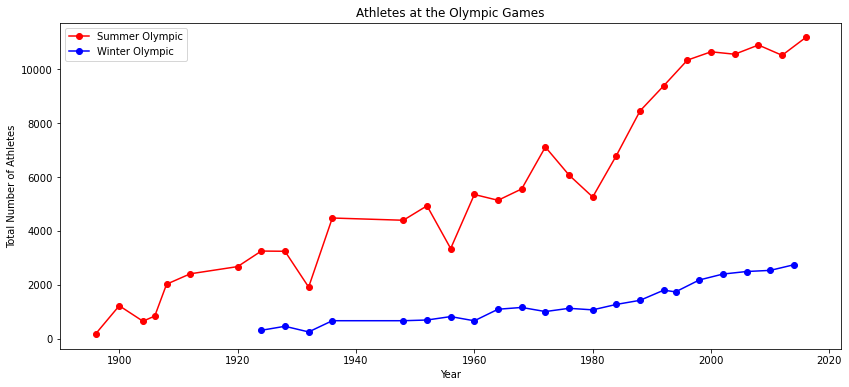

In [57]:
plt.figure(figsize=(14,6))
summer.groupby('Year')['ID'].nunique().plot(color='r',marker='o',label = 'Summer Olympic')
winter.groupby('Year')['ID'].nunique().plot(color='b',marker='o', label = 'Winter Olympic')


plt.ylabel("Total Number of Athletes")
plt.title("Athletes at the Olympic Games")
plt.legend(loc='upper left')

In [114]:
#How many Olympic games have there been since 1896

number_of_season = h.groupby('Season')['Year'].nunique()
number_of_season

Season
Summer    29
Winter    22
Name: Year, dtype: int64

In [91]:
#Number Of Athletes by regions Particiapeted In Winter Olympics
pysqldf('SELECT region,count(*) as `Number Of Athletes` from winter GROUP BY region ORDER BY `Number Of Athletes` DESC').head(5)

,region,Number Of Athletes
0,USA,3789
1,Germany,3506
2,Canada,2873
3,Russia,2837
4,Italy,2498


In [77]:
#Number Of Athletes by regions Particiapeted In Summer Olympics
pysqldf('SELECT region,count(*) as `Number Of Athletes` from summer WHERE Year == 2016 GROUP BY region ORDER BY `Number Of Athletes` DESC').head(5)

,region,Number Of Athletes
0,USA,15051
1,Germany,12374
2,UK,10910
3,France,10624
4,Russia,8855


In [113]:
#Top five Nation participate in Olympics

import plotly.graph_objects as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


topc=h.groupby('region')['ID'].count().nlargest(5).reset_index()
colors = ['gold', 'brown', 'lightblue']

trace = go.Pie(labels=topc['region'], 
               values=topc['ID'],
               hoverinfo='label+value+percent', 
               textinfo='label+value+percent', 
               textfont=dict(size=10),
               rotation=180,
               marker=dict(colors=colors, 

                           line=dict(color='#000000', width=1)
                        )
            )

data = [trace]
layout = dict(title = "Total Athletes Of Top Nation",
                  width=500,
                  height=400,
              legend=dict(orientation="h")
             )

fig = dict(data=data,layout=layout)
iplot(fig, filename='styled_pie_chart')

In [121]:
# Who was the athlete with the most Olympic appearances
appearances = h.groupby(['Name','Sex','Sport','region'])['Year'].nunique().reset_index(name="Compet").sort_values('Compet',ascending = False)[:12]

Medals = h.groupby('Name')['Medal'].count().reset_index(name = 'Medals')

pysqldf("SELECT a.Name,Sex,a.region,a.Compet,m.Medals FROM appearances a INNER JOIN Medals m ON a.Name = m.Name")

,Name,Sex,region,Compet,Medals
0,Ian Millar,M,Canada,10,1
1,Hubert Raudaschl,M,Austria,9,2
2,Paul Bert Elvstrm,M,Denmark,8,4
3,Raimondo D'Inzeo,M,Italy,8,6
4,Piero D'Inzeo,M,Italy,8,6
5,Lesley Allison Thompson-Willie,F,Canada,8,5
6,Francisco Boza Dibos,M,Peru,8,1
7,Leander Adrian Paes,M,India,7,1
8,Jess ngel Garca Bragado,M,Spain,7,0
9,Karl Ragnar Skanker (Eriksson-),M,Sweden,7,4


Text(0.5, 1.0, 'Summer Medal Distribution')

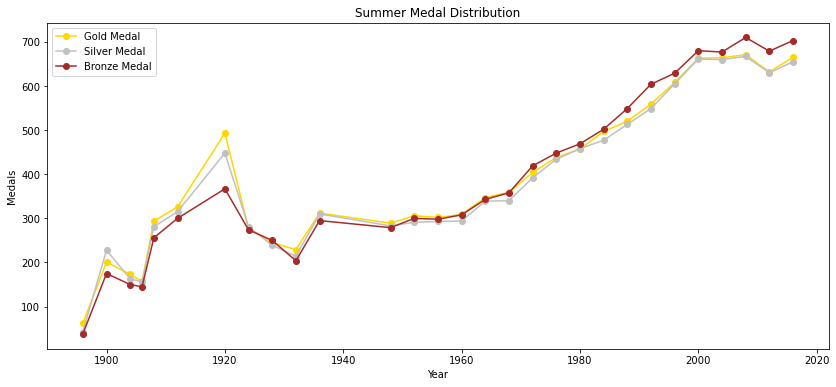

In [124]:
#Summer Olympic Medals
plt.figure(figsize=(14,6))

summer.loc[summer['Medal']=='Gold'].groupby('Year')['Medal'].count().plot(color='gold',marker='o',label='Gold Medal')

summer.loc[summer['Medal']=='Silver'].groupby('Year')['Medal'].count().plot(color='silver',marker='o',label='Silver Medal')

summer.loc[summer['Medal']=='Bronze'].groupby('Year')['Medal'].count().plot(color='brown',marker='o',label='Bronze Medal')

plt.xlabel("Year")
plt.ylabel("Medals")
plt.legend(loc='upper left')
plt.title("Summer Medal Distribution")

Text(0.5, 1.0, 'Winter Medal Distribution')

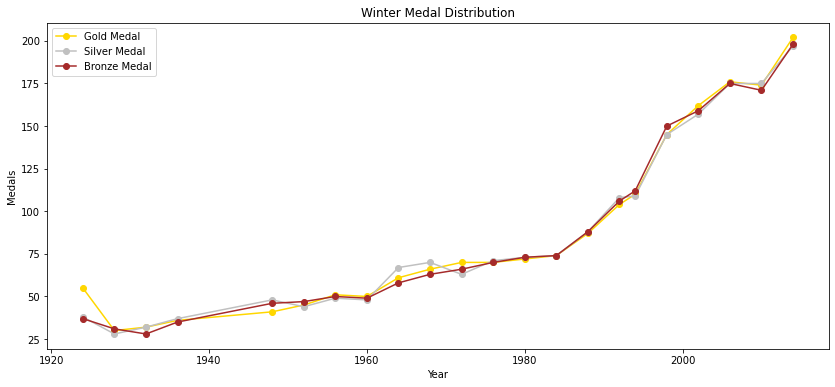

In [130]:
#Winter Olympic Medals
plt.figure(figsize=(14,6))

winter.loc[winter['Medal']=='Gold'].groupby('Year')['Medal'].count().plot(color='gold',marker='o',label='Gold Medal')

winter.loc[winter['Medal']=='Silver'].groupby('Year')['Medal'].count().plot(color='silver',marker='o',label='Silver Medal')

winter.loc[winter['Medal']=='Bronze'].groupby('Year')['Medal'].count().plot(color='brown',marker='o',label='Bronze Medal')

plt.xlabel("Year")
plt.ylabel("Medals")
plt.legend(loc='upper left')
plt.title("Winter Medal Distribution")

* More Medals distributed in Summer than Winter season.
* Highest medal distributed in summer between 550 to 700.
* In winter highest distribution of medal above 175.

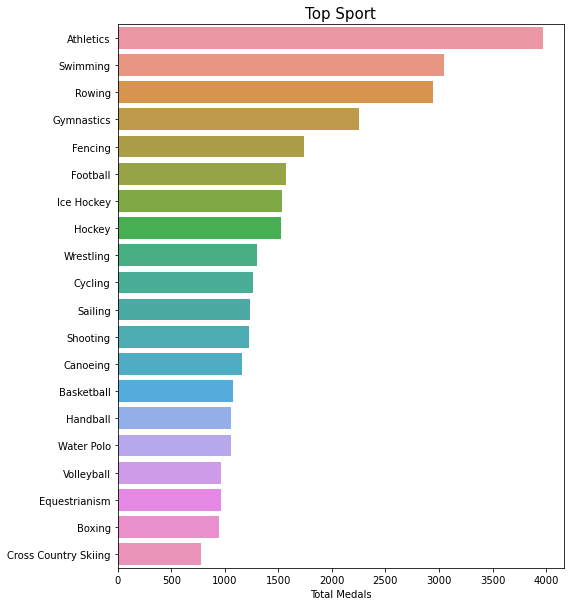

In [132]:
#sport generate more medals

plt.figure(figsize = (8,10))

g = h.groupby('Sport')['Medal'].count().nlargest(20).reset_index()
g = sns.barplot('Medal','Sport',data=g)

g.set_title("Top Sport" , fontsize = 15)
g.set_xlabel("Total Medals", fontsize = 10)
g.set_ylabel('', fontsize = 12)
plt.show()

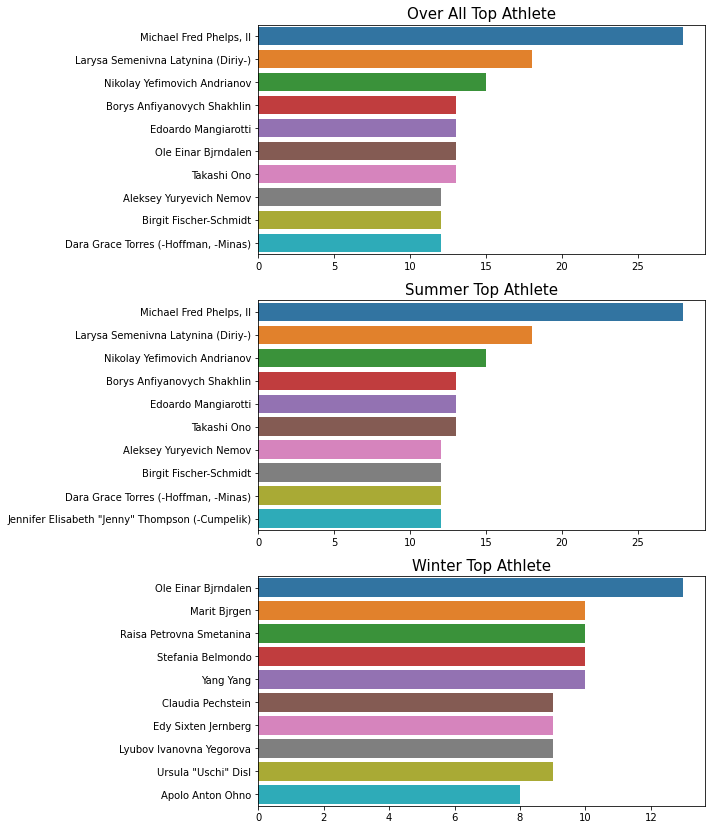

In [134]:
#Top Dominated Athlete based on Season

plt.figure(figsize = (8,14))

plt.subplot(311)
g=h.groupby('Name')['Medal'].count().nlargest(10).reset_index()
g = sns.barplot('Medal','Name',data=g)

g.set_title("Over All Top Athlete" , fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel('', fontsize = 12)

plt.subplot(312)
g=summer.groupby('Name')['Medal'].count().nlargest(10).reset_index()
g = sns.barplot('Medal','Name',data=g)

g.set_title("Summer Top Athlete" , fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel('', fontsize = 12)


plt.subplot(313)
g=winter.groupby('Name')['Medal'].count().nlargest(10).reset_index()
g = sns.barplot('Medal','Name',data=g)

g.set_title("Winter Top Athlete" , fontsize = 15)
g.set_xlabel("", fontsize = 12)
g.set_ylabel('', fontsize = 12)

plt.subplots_adjust(wspace  = 0.5, top = 0.9)

plt.show()


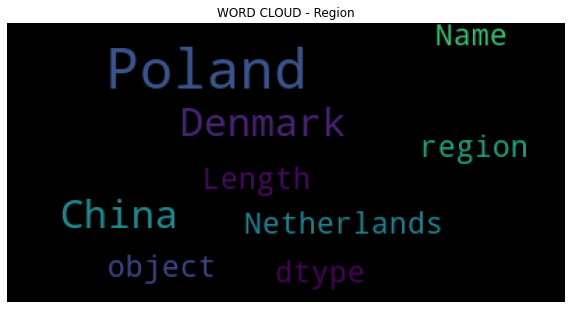

In [140]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize = (10,10))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                          random_state=1
                         ).generate(str(h['region']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Region")
plt.axis('off')
plt.show()

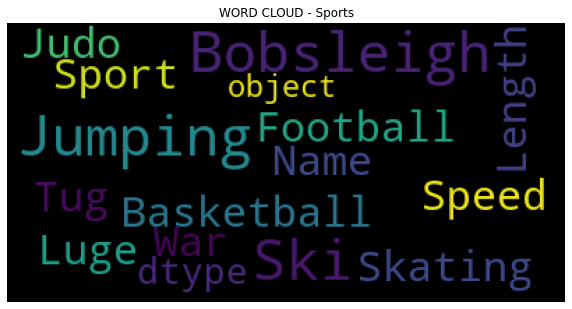

In [143]:
plt.figure(figsize = (10,10))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                          random_state=1
                         ).generate(str(h['Sport']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Sports")
plt.axis('off')
plt.show()